# Final Phase 2 Project Submission

#### Group 2
- Group members:
 - Yitzhak Njenga
 
 - David Mwangi
 
 - Valerie Vinya
 
 - Earl Chirchir
 
 - Ann Karuga
 
 - Alice Nyamongo

## Multiple Linear Regression Modeling

### Introduction

In this project we perform an end-to-end analysis of a dataset using multiple linear regression modeling to analyze house sales in a northwestern county.

### Objectives

- Prepare data for regression analysis using pandas
- Build multiple linear regression models using StatsModels
- Measure regression model performance
- Interpret multiple linear regression coefficients

### Task : Develop a model for House Prices

![Alt Text](house_prices_image)

### Business Understanding

- The primary objective is to determine how various home renovations impact the estimated value of homes in a specific northwestern county. This will enable the real estate agency to provide evidence-based advice to homeowners considering renovations.
- The real estate agency's interest lies in enhancing their service quality by offering data-driven recommendations to homeowners. This could potentially lead to higher client satisfaction, increased property values, and a more robust portfolio of attractive homes for sale.

### Data Understanding

This project uses the King County House Sales dataset, which can be found in `kc_house_data.csv` in the data folder in this GitHub repository.
We are provided with the description of the column names in `column_names.md` in the same folder.

### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

### 1. Loading the Data using Pandas

In [1]:
# importing necessary library
import pandas as pd
df = pd.read_csv("data/kc_house_data.csv", index_col=0)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


#### Doing some feature engineering to create a month column

In [2]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Extract the month and create a new column 'month'
df['month'] = df['date'].dt.month

# Convert 'month' column to categorical
df['month'] = df['month'].astype('category')

# Changing to month names instead of numbers
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['month'] = df['month'].map(month_names).astype('category')

# Display the DataFrame
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,October
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,December
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,February
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,December
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,May
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,February
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,June


#### Inspecting the Data

In [3]:
#total count of missing values
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
dtype: int64

From this inspection it is clear that we shall not use `waterfront`, `view` and `yr_renovated` columns for our data analysis since they have missing values

In [4]:
# Inspecting the distributions of the numeric features:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Inspecting the value counts for the categorical features:
categoricals = df.select_dtypes("object")

for col in categoricals:
    print(df[col].value_counts(), "\n")

NO     19075
YES      146
Name: waterfront, dtype: int64 

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64 

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64 

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64 

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2130.0        1
4130.0        1
415.0         1
1920.0        1
1481.0        1
Name: sqft_basement, Length: 304, dtype: int64 



### 2. Building a Baseline Simple Linear Regression Model

#### Identifying a Highly Correlated Predictor

The target variable is `price`. Look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with `price`.

In [6]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Retrieve the correlation values for 'price'
price_corr = corr_matrix["price"]

# Sort the values to see which one has the highest correlation
sorted_price_corr = price_corr.sort_values(ascending=False)

# Display the sorted correlations
print(sorted_price_corr)


price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64


In [7]:
# Identify the name of the predictor column with the strongest correlation below.
most_correlated = "sqft_living"

#### Plotting Sqft_living vs. Price

We create a scatter plot of sqft_living vs. price:

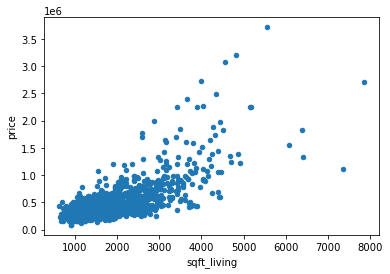

In [8]:
# Plot a sample of 1000 data points, most_correlated vs. price
df.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

#### Setting Up Variables for Regression

Declaring `y` and `X_baseline` variables, where `y` is a Series containing price data and `X_baseline` is a DataFrame containing the column with the strongest correlation.

In [9]:
y = df["price"]
X_baseline = df[[most_correlated]]

#### Creating and Fitting Simple Linear Regression

The following code uses your variables to build and fit a simple linear regression.

In [10]:
# importing necessary library
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

### 3. Evaluating and Interpreting Baseline Model Results

In [11]:
# evaluating the model performance
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 27 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:06:15   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [12]:
# evaluating model accuracy.
from sklearn.metrics import mean_absolute_error

baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

173824.8874961748

#### model findings summary

`sqft_living` is the attribute most strongly correlated with `price`, therefore our model is describing this relationship.

Overall this model is statistically significant and explains 49.3% of the variance in price. In a typical prediction, the model is off by about $173,824.

The intercept is at -\$43,990. This means that a zero-`sqft_living` house would sell for -\$43,990.
The coefficient for `sqft_living` is about \$281. This means for each additional `sqft_living`, the house costs about \$281 more.

### 4. Preparing Categorical Features for Multiple Regression Modeling

#### Identifying a Promising Predictor

Below we create bar graphs for the categories present in each categorical feature:

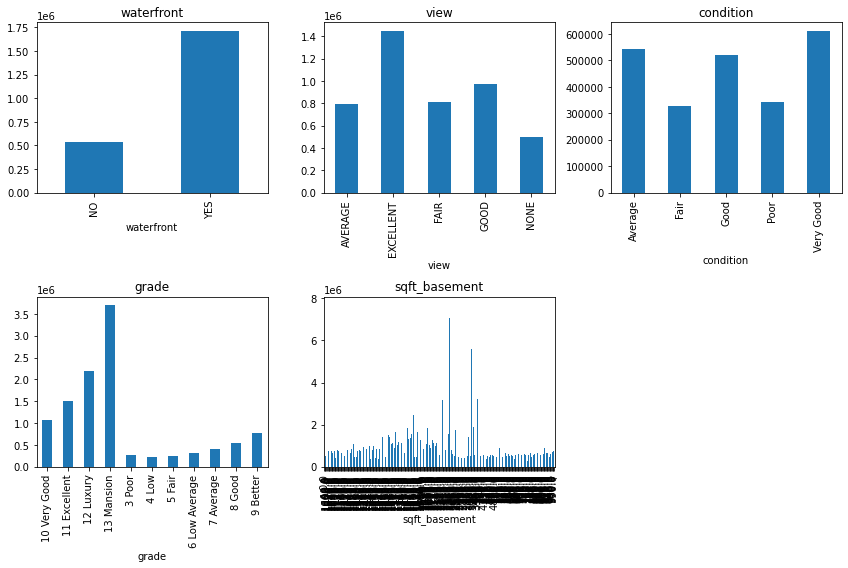

In [13]:
# importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np

categorical_features = df.select_dtypes("object").columns
n_features = len(categorical_features)

# Calculate the number of rows and columns for subplots
n_cols = 3  # Can adjusted as per your preference
n_rows = np.ceil(n_features / n_cols).astype(int)

# Adjust the figure size accordingly
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each categorical feature
for index, feature in enumerate(categorical_features):
    df.groupby(feature).mean(numeric_only=True)["price"].plot.bar(ax=axes[index])
    axes[index].set_title(feature)

# Adjust layout for better fit and to prevent label overlap
plt.tight_layout()

# If there are any empty subplots, hide them
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.show()

`date` does not appear here as it was feature engineered to month column

`sqft_basement` doesn't provide usable information

On the other hand `condition` and `grade` provide more or less the same information. We will work with `grade`.

The categorical predictor columns that can be used in our model are `waterfront`, `view` and `condition`.

`waterfront` and `view` contain missing values, hence we shall not use them.

We will use `grade` since it is the most relevant to our stakeholder.

In [14]:
# The categorical variables in our dataset
cat_col = "grade"
cat_col_2 = "month"

#### Setting Up Variables for Regression

The code below creates a variable `X_iterated`: a DataFrame containing the column with the strongest correlation and our selected categorical feature and all relevant columns for our model.

In [51]:
X_iterated = df[[most_correlated, cat_col, cat_col_2, "floors", "yr_built", "sqft_above", "bathrooms", "bedrooms"]]
X_iterated

,sqft_living,grade,month,floors,yr_built,sqft_above,bathrooms,bedrooms
id,,,,,,,,
7129300520,1180,7 Average,October,1.0,1955,1180,1.00,3
6414100192,2570,7 Average,December,2.0,1951,2170,2.25,3
5631500400,770,6 Low Average,February,1.0,1933,770,1.00,2
2487200875,1960,7 Average,December,1.0,1965,1050,3.00,4
1954400510,1680,8 Good,February,1.0,1987,1680,2.00,3
...,...,...,...,...,...,...,...,...
263000018,1530,8 Good,May,3.0,2009,1530,2.50,3
6600060120,2310,8 Good,February,2.0,2014,2310,2.50,4
1523300141,1020,7 Average,June,2.0,2009,1020,0.75,2


#### Preprocessing the Categorical Variables

If we tried to pass `X_iterated` as-is into `sm.OLS`, we would get an error. We need to use `pd.get_dummies` to create dummy variables for `cat_col` and `cat_col_2`.

We do not use `drop_first=True`, so as to intentionally set a meaningful reference category instead.

In [52]:
# Use pd.get_dummies to one-hot encode the categorical column in X_iterated ("grade")
X_iterated = pd.get_dummies(X_iterated, columns=[cat_col])
X_iterated

,sqft_living,month,floors,yr_built,sqft_above,bathrooms,bedrooms,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,,,,,,,
7129300520,1180,October,1.0,1955,1180,1.00,3,0,0,0,0,0,0,0,0,1,0,0
6414100192,2570,December,2.0,1951,2170,2.25,3,0,0,0,0,0,0,0,0,1,0,0
5631500400,770,February,1.0,1933,770,1.00,2,0,0,0,0,0,0,0,1,0,0,0
2487200875,1960,December,1.0,1965,1050,3.00,4,0,0,0,0,0,0,0,0,1,0,0
1954400510,1680,February,1.0,1987,1680,2.00,3,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,1530,May,3.0,2009,1530,2.50,3,0,0,0,0,0,0,0,0,0,1,0
6600060120,2310,February,2.0,2014,2310,2.50,4,0,0,0,0,0,0,0,0,0,1,0
1523300141,1020,June,2.0,2009,1020,0.75,2,0,0,0,0,0,0,0,0,1,0,0


In [53]:
# Use pd.get_dummies to one-hot encode the categorical column in X_iterated ("month")
X_iterated = pd.get_dummies(X_iterated, columns=[cat_col_2])
X_iterated

,sqft_living,floors,yr_built,sqft_above,bathrooms,bedrooms,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,...,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December
id,,,,,,,,,,,,,,,,,,,,,
7129300520,1180,1.0,1955,1180,1.00,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6414100192,2570,2.0,1951,2170,2.25,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5631500400,770,1.0,1933,770,1.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2487200875,1960,1.0,1965,1050,3.00,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1954400510,1680,1.0,1987,1680,2.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,1530,3.0,2009,1530,2.50,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6600060120,2310,2.0,2014,2310,2.50,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1523300141,1020,2.0,2009,1020,0.75,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Now, applying domain understanding, we choose a column to drop and drop it. This category should make sense as a "baseline" or "reference". For the columns that were generated when `pd.get_dummies` was used, we need to remove the spaces in the column names.

In [54]:
# Removing the spaces in the column names
X_iterated.columns = X_iterated.columns.str.replace(' ', '')
X_iterated

,sqft_living,floors,yr_built,sqft_above,bathrooms,bedrooms,grade_10VeryGood,grade_11Excellent,grade_12Luxury,grade_13Mansion,...,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December
id,,,,,,,,,,,,,,,,,,,,,
7129300520,1180,1.0,1955,1180,1.00,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6414100192,2570,2.0,1951,2170,2.25,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5631500400,770,1.0,1933,770,1.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2487200875,1960,1.0,1965,1050,3.00,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1954400510,1680,1.0,1987,1680,2.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,1530,3.0,2009,1530,2.50,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6600060120,2310,2.0,2014,2310,2.50,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1523300141,1020,2.0,2009,1020,0.75,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
# "grade_3 Poor" is the worst condition so we'll drop that as the baseline
X_iterated.drop("grade_3Poor", axis=1, inplace=True)

In [56]:
# "month_January" is the first month of the year so we'll drop that as the baseline
X_iterated.drop("month_January", axis=1, inplace=True)

### 5. Building a Multiple Linear Regression Model

Using the `y` variable from our previous model and `X_iterated` which includes all relevant columns, we build a model called `iterated_model` and a regression results object called `iterated_results`.

In [57]:
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

### 6. Evaluate and Interpret Multiple Linear Regression Model Results

The following code will print the results summary.

In [58]:
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1470.
Date:                Wed, 27 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:17:43   Log-Likelihood:            -2.9612e+05
No. Observations:               21597   AIC:                         5.923e+05
Df Residuals:                   21569   BIC:                         5.925e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.289e+06   2.52e+0

#### Evaluating model accuracy using an Error-Based Metric

In [59]:
# evaluating model accuracy.

multiple_model_mae = mean_absolute_error(y, iterated_results.predict(sm.add_constant(X_iterated)))
multiple_model_mae

138810.63347580546

## Final Model Results

Here we'll walk through a narrative version of our final model, starting from the beginning

Our stakeholder was a real estate agency that helps homeowners buy and/or sell homes. Their business problem was to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

### Data Understanding and Preparation

Our final model included these features:

- `sqft_living`
- `grade`
- `month`
- `floors`
- `yr_built`

- `sqft_above` 

- `bathrooms`

- `bedroom`

We performed data cleaning on `grade` and `month` to account for typos. Then we one-hot encoded `grade` and `month`, resulting in 23 dummy predictors.

### Model Metrics

These features were fed into an ordinary least-squares multiple regression model. This model:
    
  - is statistically overally significant overall (F-statistic p-value 0.00)
  
  - explains about 65% of the variance in price (adjusted R-Squared 0.637)
  
  - is off by about $138k in an average prediction (RMSE 138810.63347580546)

### Model Diagnostics

Below are partial regression plots for all model features:

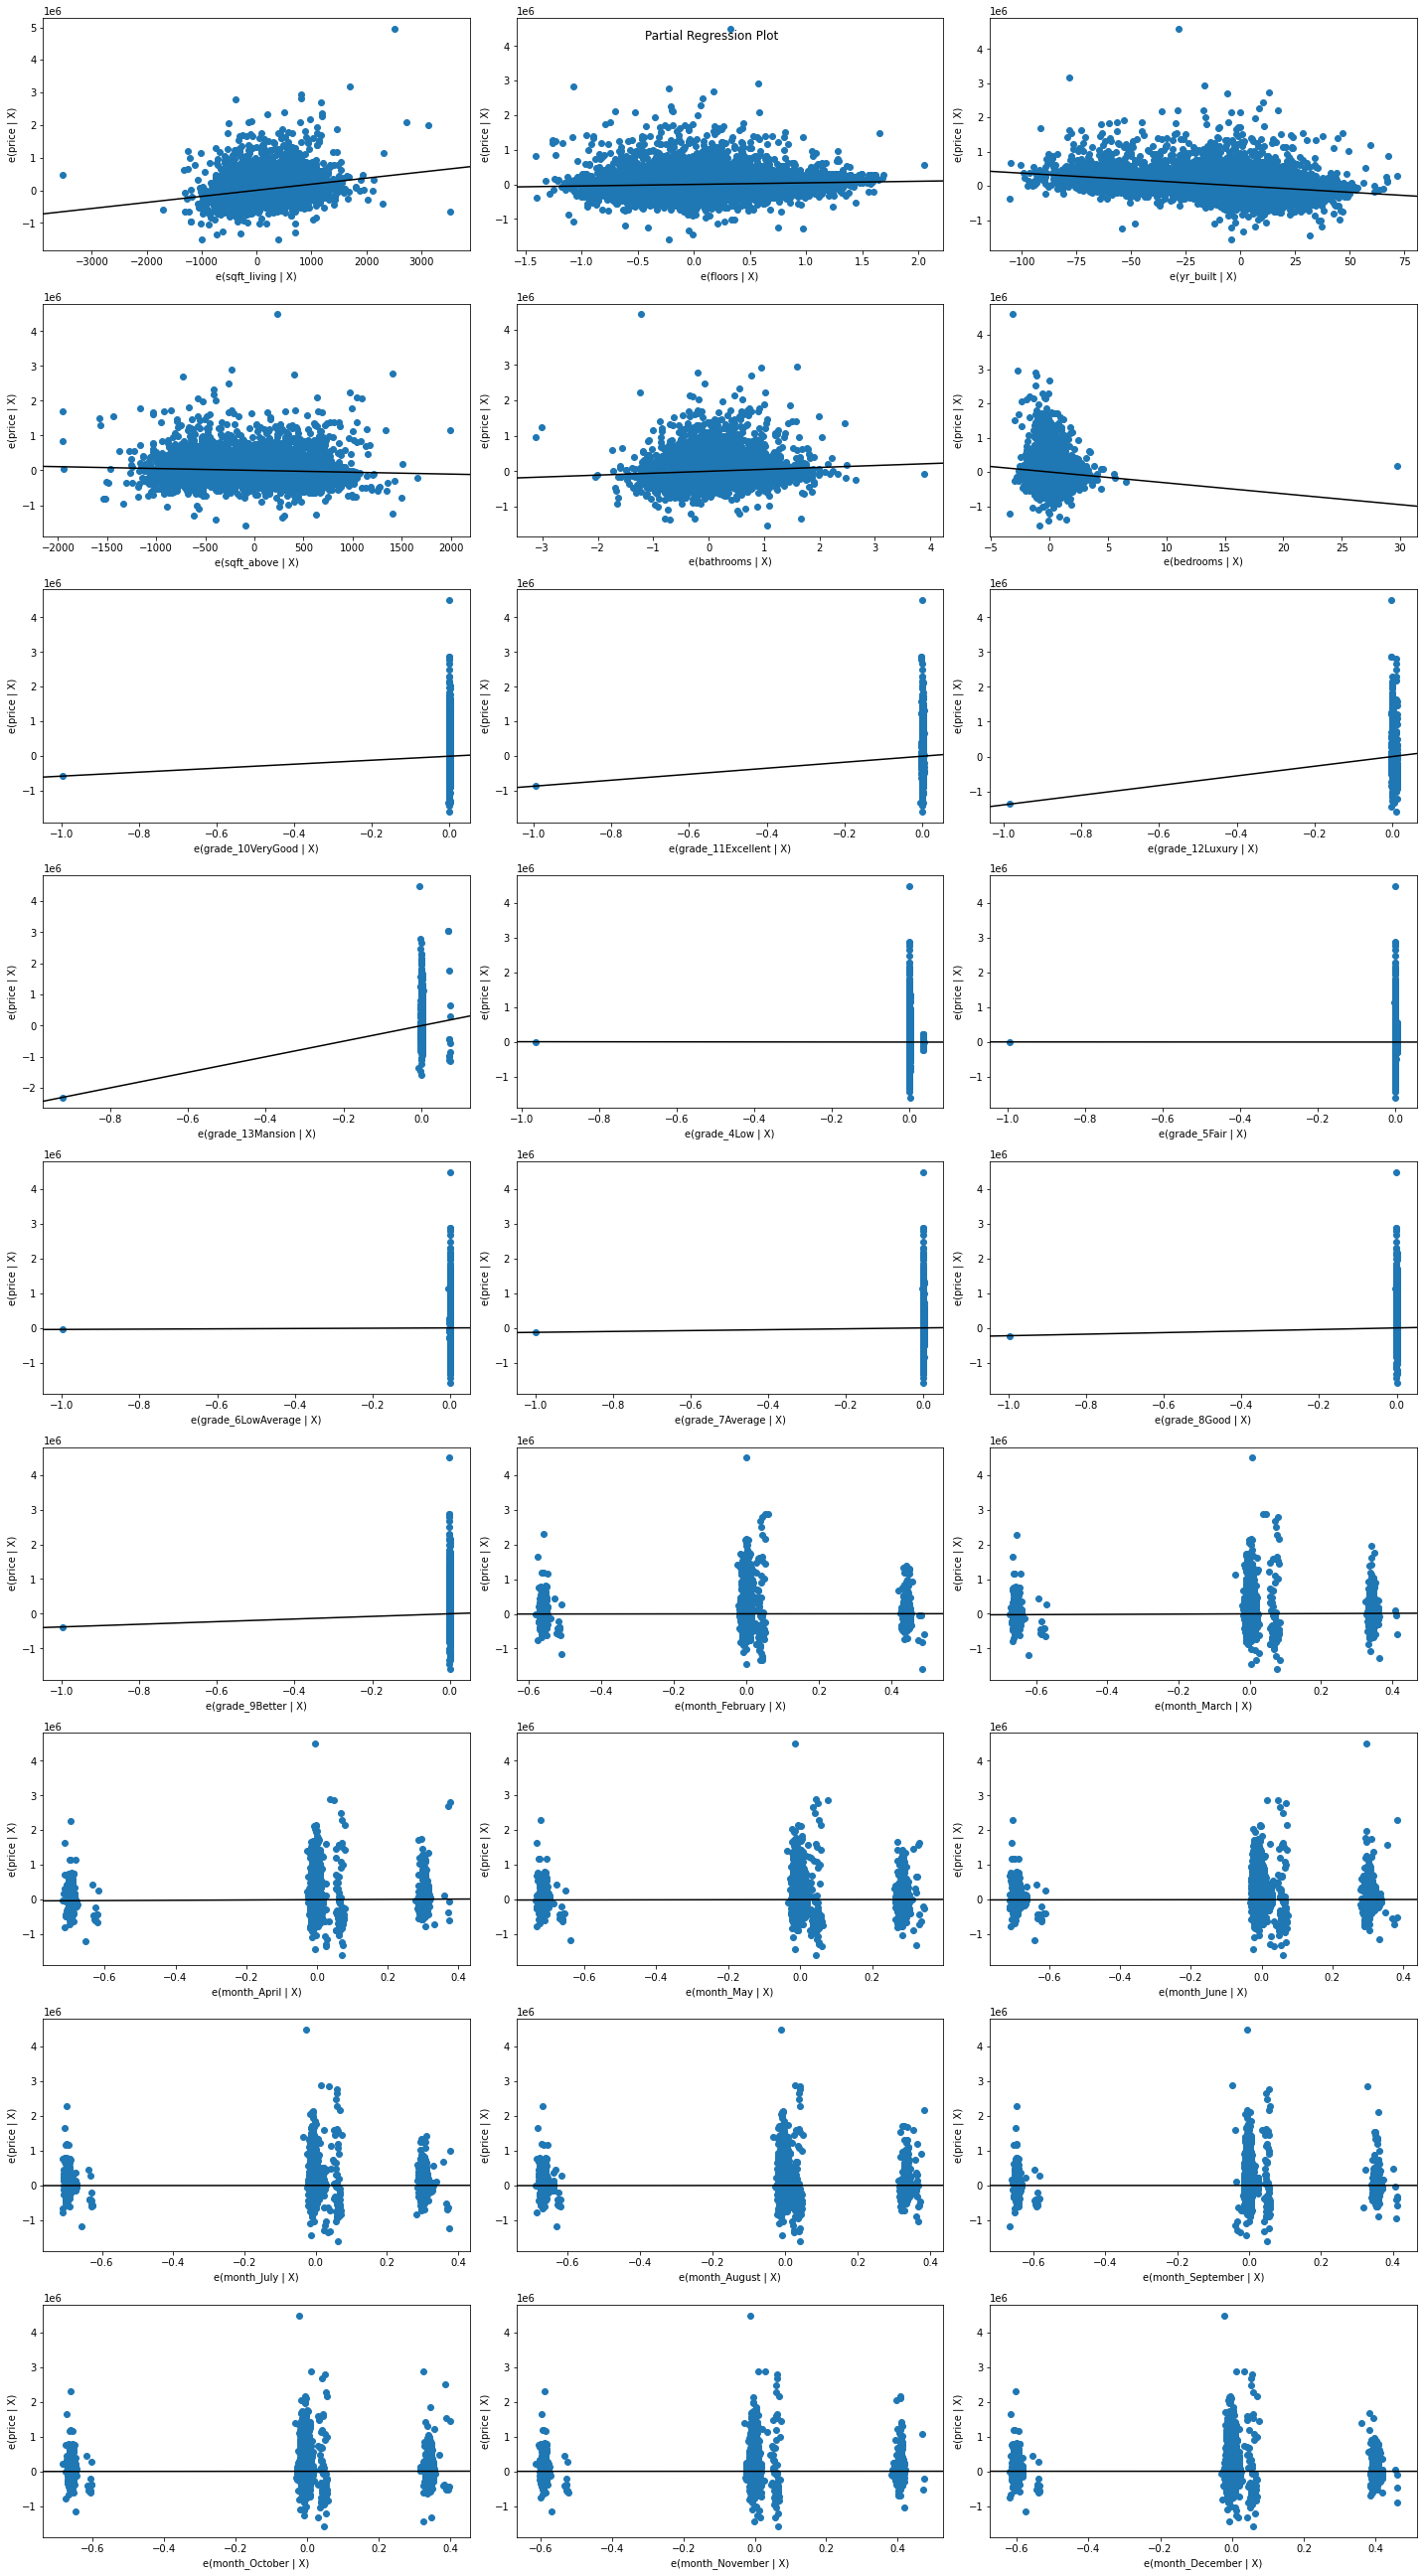

In [61]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# iterated_results and X_iterated are defined
# Adjust the grid size based on the number of features
n_features = len(X_iterated.columns)
n_rows = 10  # Set number of rows to 8
n_cols = (n_features + n_rows - 1) // n_rows  # Adjust the number of columns to fit all features

# Increase the figure size for better visibility
fig = plt.figure(figsize=(20, 4 * n_rows))  # Adjust width and height as needed

sm.graphics.plot_partregress_grid(
    iterated_results,
    exog_idx=list(X_iterated.columns),
    grid=(n_rows, n_cols),
    fig=fig
)
plt.tight_layout()
plt.show()


### Model Interpretation

Below are all model coefficients and p-values:

In [65]:
results_df = pd.concat([iterated_results.params, iterated_results.pvalues], axis=1)
results_df.columns = ["coefficient", "p-value"]
results_df

,coefficient,p-value
const,7.289378e+06,3.354988e-181
sqft_living,1.861216e+02,0.000000e+00
floors,4.557353e+04,2.428655e-33
yr_built,-3.728393e+03,0.000000e+00
sqft_above,-5.345636e+01,1.283363e-32
bathrooms,5.422569e+04,2.979087e-53
bedrooms,-3.171058e+04,2.915704e-52
grade_10VeryGood,5.741560e+05,8.604462e-03
grade_11Excellent,8.634037e+05,7.956597e-05
grade_12Luxury,1.388638e+06,2.744990e-10


And these are only coefficients with p-values below 0.05:

In [66]:
results_df = results_df[results_df["p-value"] < 0.05].sort_values(by="coefficient")
results_df

,coefficient,p-value
bedrooms,-3.171058e+04,2.915704e-52
yr_built,-3.728393e+03,0.000000e+00
sqft_above,-5.345636e+01,1.283363e-32
sqft_living,1.861216e+02,0.000000e+00
month_March,3.701837e+04,1.720669e-05
month_April,4.267685e+04,3.463814e-07
floors,4.557353e+04,2.428655e-33
bathrooms,5.422569e+04,2.979087e-53
grade_10VeryGood,5.741560e+05,8.604462e-03
grade_11Excellent,8.634037e+05,7.956597e-05


Writing this out:
- For a house with sqft_living, yr_built and floors of 0 (nonsensical), as well as month and grade of January and Poor respectively, we would expect a price of about $6,908,865
 - This is not a valid price, since house with sqft_living 0 is not valid either.
 
- For each increase of 1 in `sqft_living`, we see an associated increase in price of about $156

- For each increase of 1 in `yr_built`, we see an associated decrease in price of about $-3,530

- For each increase of 1 in `floors`, we see an associated increase in price of about $41,108

- For each increase of 1 in `sqft_above`, we see an associated decrease in price of about $-53

- For each increase of 1 in `bathrooms`, we see an associated increase in price of about $54,226

- For each increase of 1 in `bedrooms`, we see an associated decrease in price of about $-31,711

- Breaking down the `month`:
 - For a house sold in May compared to a house sold in January, we see an associated increase in price of about $17,399
 
 - For a house sold in March compared to a house sold in January, we see an associated increase in price of about $36,944
 
 - For a house sold in April compared to a house sold in January, we see an associated increase in price of about $43,353
 
- Breaking down the `grade`:
 - For a house of grade_10VeryGood compared to a house of grade_3Poor, we see an associated increase in price of about $546,142
 
 - For a house of grade_11Excellent compared to a house of grade_3Poor, we see an associated increase in price of about $841,035
 
 - For a house of grade_12Luxury compared to a house of grade_3Poor, we see an associated increase in price of about $1,381,427
 
 - For a house of grade_13Mansion compared to a house of grade_3Poor, we see an associated increase in price of about $2,521,888

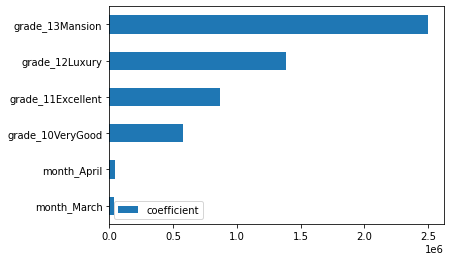

In [67]:
results_df.drop(["const", "yr_built", "sqft_living", "floors", "sqft_above", "bedrooms", "bathrooms"]).plot.barh(y="coefficient");

Note that while we included `month` and `grade` categories with higher p-values in the model, we did not report their coefficients. That is because we can't be confident that those coefficients aren't actually zero. Also we did not report a coefficient for `zipcode` because this had no significant effect on our model performance.

We also aren't plotting the `month` and `grade` values on the same graph as the `yr_built`, `sqft_living`, `sqft_above`, `bathrooms`, `bedrooms` and `floors` values because they are all measured in different units, so it doesn't really make sense to compare them. Whereas it might be interesting to a stakeholder to see just the `month` and `grade` values compared against each other.